## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-010-18-MVRS-01

In [1]:
import random
from math import sqrt
import numpy as np

import matplotlib
import numpy as np
matplotlib.use('TkAgg')
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
class Truck(object):

    def __init__(self, name):
        self.name = name
        self.x = float(random.randint(0, 40))
        self.y = float(random.randint(0, 40))
        self.target = None

    def get_distance(self, target):
        """
        Return distance between self and any target object
        """
        x_squared = pow((self.x - target.x), 2)
        y_squared = pow((self.y - target.y), 2)

        return sqrt(x_squared + y_squared)

    def drive_to_target(self):
        """
        Moves self closer to current target
        """

        if self.target is None:
            return

        if self.get_distance(self.target) < .2:
            self.target.reached = True
        else:
            self.x += (self.target.x - self.x) * .2
            self.y += (self.target.y - self.y) * .2

In [3]:
class Target(object):

    def __init__(self, reached=False):
        self.x = float(random.randint(0, 40))
        self.y = float(random.randint(0, 40))
        self.reached = reached

In [4]:
class Dispatcher(object):
    """
    Class responsible for moving trucks and tracking targets
    """

    def __init__(self):
        self.trucks = [Truck("RED"), Truck("GREEN")]
        self.targets = list(set([Target() for i in range(100)]))
        self.job_complete = False

    def move_trucks(self):
        """
        Brute force to find best targets for respective trucks
        """

        # Check if all targets have been reached
        unreached_targets = [target for target in self.targets if target.reached is False]
        if len(unreached_targets) == 0:
            self.job_complete = True
            return

        # List of tuples: (truck object, target object, distance)
        truck_target_distance = []

        for truck in self.trucks:
            for target in unreached_targets:
                truck_target_distance.append((truck, target, truck.get_distance(target)))

        # Sort by distance
        truck_target_distance.sort(key=lambda x: x[2])

        next_moves = truck_target_distance[:1]

        for potential_move in truck_target_distance:
            if potential_move[0] != next_moves[0][0]:
                if potential_move[1] != next_moves[0][1]:
                    next_moves.append(potential_move)
                    break
            else:
                continue

        for move in next_moves:
            move[0].target = move[1]
            move[0].drive_to_target()

In [5]:
class Plot(object):
    """
    Class responsible for plotting the movement of Trucks and Targets
    """

    def __init__(self, dispatch):
        """
        Takes a Dispatcher object and plots its state.
        """
        self.dispatch = dispatch

        # Initalize plot
        self.fig = plt.figure(figsize=(15,15))
        self.ax = self.fig.subplots()
        self.ax.set_xlim(0, 40)
        self.ax.set_ylim(0, 40)

        # Trucks represented by points
        self.points_red, = self.ax.plot(self.dispatch.trucks[0].x, self.dispatch.trucks[0].y, color='red', marker='^', linestyle='None')

        self.points_green, = self.ax.plot(self.dispatch.trucks[1].x, self.dispatch.trucks[1].y, color='green', marker='^', linestyle='None')

        # Targets represented by points.
        targets_x_coordinates = [target.x for target in self.dispatch.targets]
        targets_y_coordinates = [target.y for target in self.dispatch.targets]
        self.points_targets_unreached, = self.ax.plot(targets_x_coordinates, targets_y_coordinates, color="blue", marker='o', linestyle='None')

        # No completed targets initially
        self.points_targets_reached, = self.ax.plot([], [], color="pink", marker='o', linestyle='None')

    def update(self):
        """
        Updates plot as trucks move and targets are reached
        """

        # Plot unreached targets
        targets_unreached_x_coordinates = [target.x for target in self.dispatch.targets if target.reached is False]
        targets_unreached_y_coordinates = [target.y for target in self.dispatch.targets if target.reached is False]
        self.points_targets_unreached.set_data(targets_unreached_x_coordinates, targets_unreached_y_coordinates)

        # Plot reached targets
        targets_reached_x_coordinates = [target.x for target in self.dispatch.targets if target.reached is True]
        targets_reached_y_coordinates = [target.y for target in self.dispatch.targets if target.reached is True]
        self.points_targets_reached.set_data(targets_reached_x_coordinates, targets_reached_y_coordinates)

        # Plot movement of trucks
        self.points_red.set_data(np.float(self.dispatch.trucks[0].x), np.float(self.dispatch.trucks[0].y))
        self.points_green.set_data(np.float(self.dispatch.trucks[1].x), np.float(self.dispatch.trucks[1].y))

        # Pause for capture animation
        plt.pause(0.001)

In [6]:
def main_proc():
    """
    1. Creates an instance of the Dispatcher class.
    2. Creates an instance of the Plot class.
    3. Move trucks towards targets until all targets have been reached.
    """

    random.seed(1968)
    d = Dispatcher()
    p = Plot(d)

    while d.job_complete is False:
        d.move_trucks()
        p.update()

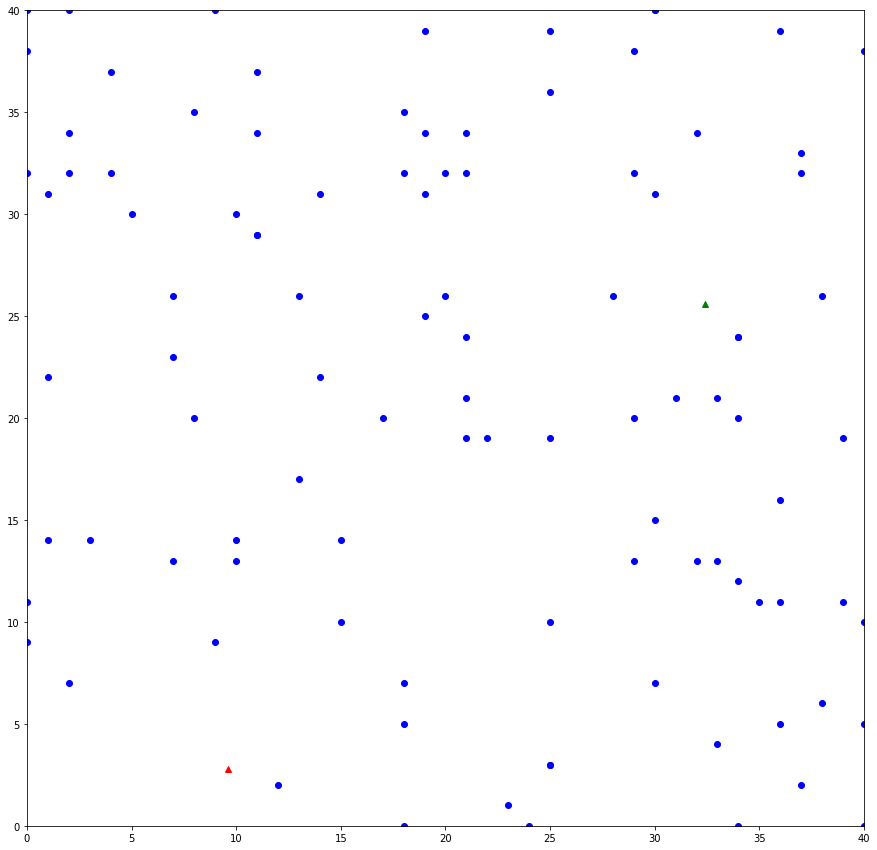

In [7]:
main_proc()

## Done

In [8]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-10-19 22:29:15.453611
